In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

In [4]:
print(tf.__version__)

2.8.0


In [5]:
import h5py

# Open the file as read only
# User can make changes in the path as required
h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

In [6]:
len(X_train), len(X_test)

(42000, 18000)

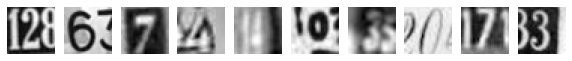

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [7]:
#Question 1: Complete the below code to visualize the first 10 images from the training data (1 Mark)
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray") # write the function to visualize images
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [8]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [9]:
# Reshaping the dataset to flatten them. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)

In [10]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


In [14]:
#Question 2: One-hot encode the labels in the target variable y_train and y_test (2 Marks)
#Write the function and appropriate variable name to one-hot encode the output

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [15]:
#Model Building
#Now, we have done data preprocessing, let's build a CNN model.

#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [49]:
#Model Architecture
#Write a function that returns a sequential model with the following architecture
#First Convolutional layer with 16 filters and kernel size of 3x3. Use the 'same' padding and provide an apt input shape
#Add a LeakyRelu layer with the slope equal to 0.1
#Second Convolutional layer with 32 filters and kernel size of 3x3 with 'same' padding
#Another LeakyRelu with the slope equal to 0.1
#A max-pooling layer with a pool size of 2x2

#Flatten the output from the previous layer
#Add a dense layer with 32 nodes
#Add a LeakyRelu layer with slope equal to 0.1
#Add the final output layer with nodes equal to the number of classes and softmax activation
#Compile the model with the categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric. Do not fit the model here, just return the compiled model
#Call the function and store the model in a new variable
#Print the summary of the model.
#Fit the model on the train data with a validation split of 0.2, batch size = 32, verbose = 1, and 20 epochs. Store the model building history to use later for visualization.

#Question 3: Build and train a CNN model as per the above mentioned architecture (10 Marks)

#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def cnn_model_1():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(( 32, 32, 1))))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', ))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Flattening the model and making room for the fully connected component
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(10, activation='softmax'))

    #declare adam optimizer with learning rate of 0.001 
    Adam = tf.keras.optimizers.Adam(learning_rate=0.001)
    
    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
    
    return model

In [50]:
model_1 = cnn_model_1()

In [51]:
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 32, 32, 16)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                      

In [52]:
history_model_1 = model_1.fit(X_train, y_train, validation_split= 0.2, batch_size= 32, epochs=20, verbose=1)

Epoch 1/20
1050/1050 [==============================] - 64s 60ms/step - loss: 1.1312 - accuracy: 0.6305 - val_loss: 0.6864 - val_accuracy: 0.7998
Epoch 2/20
1050/1050 [==============================] - 70s 66ms/step - loss: 0.5591 - accuracy: 0.8403 - val_loss: 0.5307 - val_accuracy: 0.8536
Epoch 3/20
1050/1050 [==============================] - 75s 71ms/step - loss: 0.4675 - accuracy: 0.8645 - val_loss: 0.5167 - val_accuracy: 0.8558
Epoch 4/20
1050/1050 [==============================] - 63s 60ms/step - loss: 0.4116 - accuracy: 0.8800 - val_loss: 0.4698 - val_accuracy: 0.8727
Epoch 5/20
1050/1050 [==============================] - 65s 62ms/step - loss: 0.3721 - accuracy: 0.8898 - val_loss: 0.5151 - val_accuracy: 0.8621
Epoch 6/20
1050/1050 [==============================] - 70s 67ms/step - loss: 0.3364 - accuracy: 0.9000 - val_loss: 0.4950 - val_accuracy: 0.8693
Epoch 7/20
1050/1050 [==============================] - 68s 65ms/step - loss: 0.3085 - accuracy: 0.9090 - val_loss: 0.4794 -

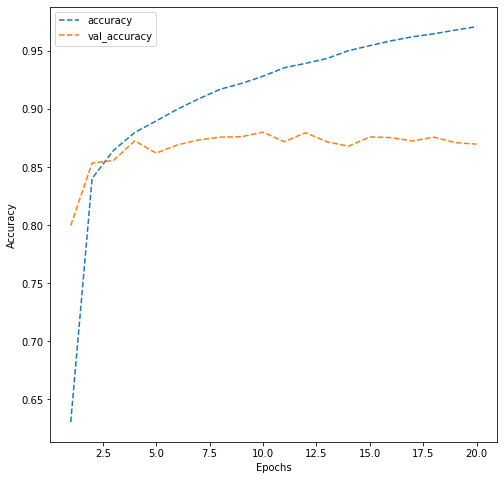

In [53]:
#Question 4: Write your observations on the below plot (2 Marks)
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

Observations:
- "Accuracy" is at a larger margin of reaching the maxiumum prediction compared to the 'Val_accuracy" where above 2.5 Epochs "Accuracy" reaches above 85% to a max amount of 97%, while "Val_accuracy" pleateaus at ~88%.

In [54]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [55]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [57]:
#Second Model Architecture
#Write a function that returns a sequential model with the following architecture
#First Convolutional layer with 16 filters and kernel size of 3x3. Use the 'same' padding and provide an apt input shape
#Add a LeakyRelu layer with the slope equal to 0.1
#Second Convolutional layer with 32 filters and kernel size of 3x3 with 'same' padding
#Add LeakyRelu with the slope equal to 0.1
#Add a max-pooling layer with a pool size of 2x2
#Add a BatchNormalization layer
#Third Convolutional layer with 32 filters and kernel size of 3x3 with 'same' padding
#Add a LeakyRelu layer with slope equal to 0.1
#Fourth Convolutional layer 64 filters and kernel size of 3x3 with 'same' padding
#Add a LeakyRelu layer with slope equal to 0.1
#Add a max-pooling layer with a pool size of 2x2
#Add a BatchNormalization layer
#Flatten the output from the previous layer
#Add a dense layer with 32 nodes
#Add a LeakyRelu layer with slope equal to 0.1
#Add a dropout layer with rate equal to 0.5
#Add the final output layer with nodes equal to the number of classes and softmax activation
#Compile the model with the categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric. Do not fit the model here, just return the compiled model
#Call the function and store the model in a new variable
#Print the summary of the model.
#Fit the model on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs. Store the model building history to use later for visualization.

#Question 5: Build and train the second CNN model as per the above mentioned architecture (10 Marks)
#Define the function
def cnn_model_2():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(( 32, 32, 1))))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', ))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    #declare adam optimizer with learning rate of 0.001 
    Adam = tf.keras.optimizers.Adam(learning_rate=0.001)
    
    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
    
    return model

In [58]:
# Build the model
model_2 = cnn_model_2()

In [59]:
#Print the summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [60]:
# Fit the model
history_model_2 = model_2.fit(X_train, y_train, validation_split= 0.2, batch_size= 128, epochs=30, verbose=1)

Epoch 1/30
263/263 [==============================] - 59s 222ms/step - loss: 2.2651 - accuracy: 0.1184 - val_loss: 2.2597 - val_accuracy: 0.1729
Epoch 2/30
263/263 [==============================] - 59s 223ms/step - loss: 2.0223 - accuracy: 0.2414 - val_loss: 1.4419 - val_accuracy: 0.6505
Epoch 3/30
263/263 [==============================] - 59s 225ms/step - loss: 1.1780 - accuracy: 0.5971 - val_loss: 0.6898 - val_accuracy: 0.8030
Epoch 4/30
263/263 [==============================] - 59s 224ms/step - loss: 0.9009 - accuracy: 0.6993 - val_loss: 0.5927 - val_accuracy: 0.8324
Epoch 5/30
263/263 [==============================] - 59s 225ms/step - loss: 0.8000 - accuracy: 0.7340 - val_loss: 0.5183 - val_accuracy: 0.8519
Epoch 6/30
263/263 [==============================] - 59s 225ms/step - loss: 0.7425 - accuracy: 0.7508 - val_loss: 0.5142 - val_accuracy: 0.8465
Epoch 7/30
263/263 [==============================] - 59s 224ms/step - loss: 0.7048 - accuracy: 0.7660 - val_loss: 0.5390 - val_ac

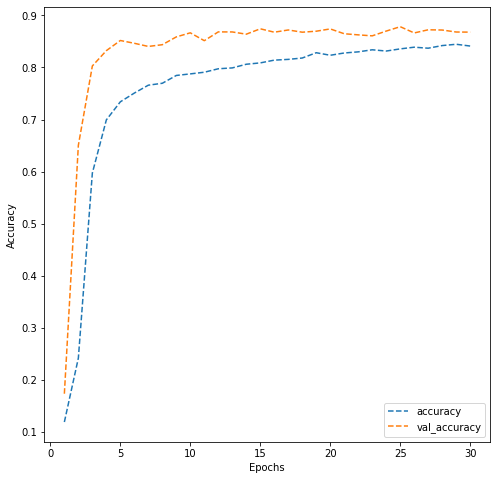

In [61]:
#Plotting the validation and training accuracies

#Question 6: Write your observations on the below plot (2 Marks)
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

Observations:
- "Val_accuracy" maintains a higher accuracy consistently compared to the "accuracy" model

In [72]:
#Question 7: Make predictions on the test data using the second model (1 Mark)
#Make prediction on the test data using model_2 
test_pred = np.round(model_2.predict(X_test))

test_pred = np.argmax(test_pred, axis=-1)

In [66]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

              precision    recall  f1-score   support

           0       0.58      0.93      0.72      1814
           1       0.89      0.88      0.88      1828
           2       0.95      0.83      0.88      1803
           3       0.90      0.76      0.83      1719
           4       0.91      0.90      0.90      1812
           5       0.86      0.87      0.87      1768
           6       0.86      0.86      0.86      1832
           7       0.96      0.83      0.89      1808
           8       0.90      0.78      0.84      1812
           9       0.87      0.85      0.86      1804

    accuracy                           0.85     18000
   macro avg       0.87      0.85      0.85     18000
weighted avg       0.87      0.85      0.85     18000



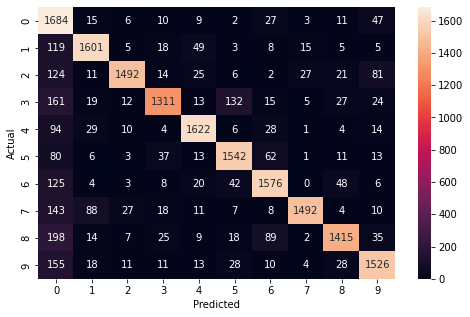

In [73]:
#Question 8: Write your final observations on the performance of the model on the test data (2 Marks)
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Observations:
- Class 3 has a poor recall rate. Only about 76% of the relevant labeled digits cropped from street-level photo.
- Class 0 on the other hand, has the highest recall and precision score.
The overall accuracy is 93%.